In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
#pip install catboost

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
# Data preprocessing and EDA

In [93]:
test.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [9]:
train.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
any(train.duplicated())

False

In [94]:
any(test.duplicated())

False

In [11]:
corr_matrix = train.corr()

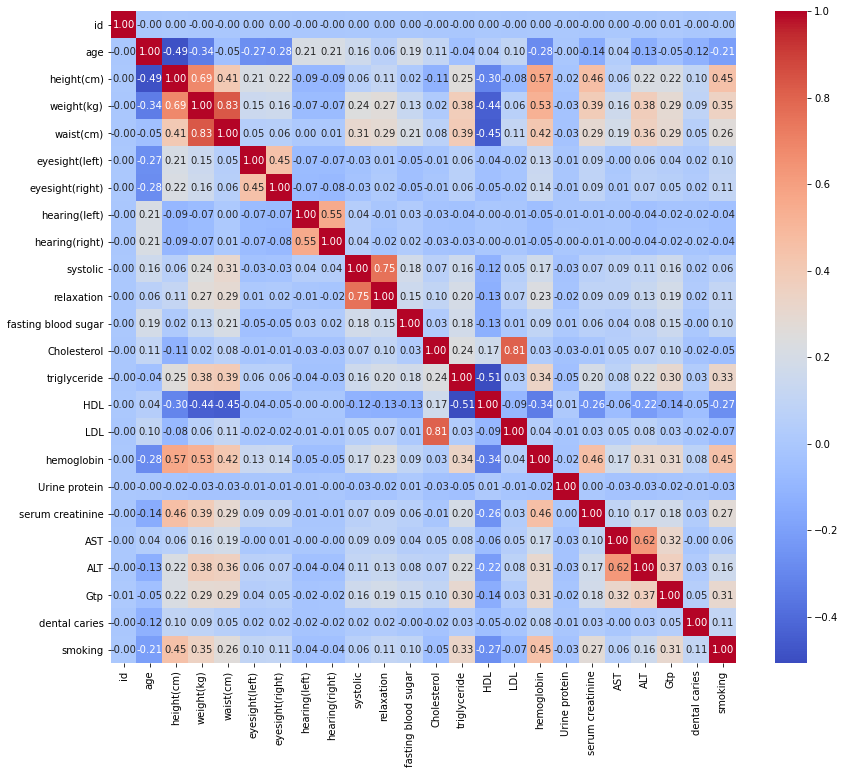

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()


In [13]:
X = train.drop('smoking',axis=1)
y = train['smoking']

In [14]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
mutual_info = mutual_info_classif(X_train,y_train)

In [16]:
for i,col in enumerate(X_train.columns):
    print(f"Feature '{col}': Mutual Information = {mutual_info[i]}")

Feature 'id': Mutual Information = 0.0
Feature 'age': Mutual Information = 0.02511730230998399
Feature 'height(cm)': Mutual Information = 0.13554970318270176
Feature 'weight(kg)': Mutual Information = 0.08118715944032884
Feature 'waist(cm)': Mutual Information = 0.046491385883409286
Feature 'eyesight(left)': Mutual Information = 0.014237288043781993
Feature 'eyesight(right)': Mutual Information = 0.015662417643640403
Feature 'hearing(left)': Mutual Information = 0.015384632777276197
Feature 'hearing(right)': Mutual Information = 0.016191572724793435
Feature 'systolic': Mutual Information = 0.011232826396227358
Feature 'relaxation': Mutual Information = 0.012774000844768985
Feature 'fasting blood sugar': Mutual Information = 0.010210371861520962
Feature 'Cholesterol': Mutual Information = 0.006641428379823067
Feature 'triglyceride': Mutual Information = 0.07644149186993232
Feature 'HDL': Mutual Information = 0.0426645646043089
Feature 'LDL': Mutual Information = 0.007882744535183894
Fea

In [17]:
X_train['bmi'] = (X_train['weight(kg)'])/((X_train['height(cm)']/100)**2)

<ipython-input-17-11c5a4560ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bmi'] = (X_train['weight(kg)'])/((X_train['height(cm)']/100)**2)


In [18]:
X_train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'bmi'],
      dtype='object')

In [19]:
mutual_info_1 = mutual_info_classif(X_train,y_train)

In [20]:
for i,col in enumerate(X_train.columns):
    print(f"Feature={col},Mutual_info={mutual_info_1[i]}")

Feature=id,Mutual_info=0.0
Feature=age,Mutual_info=0.026475970254515424
Feature=height(cm),Mutual_info=0.13854750404739802
Feature=weight(kg),Mutual_info=0.08137702012699433
Feature=waist(cm),Mutual_info=0.04521470588441767
Feature=eyesight(left),Mutual_info=0.009522645712353839
Feature=eyesight(right),Mutual_info=0.015891090869710522
Feature=hearing(left),Mutual_info=0.017236618357550304
Feature=hearing(right),Mutual_info=0.014278215683737328
Feature=systolic,Mutual_info=0.011017379301423436
Feature=relaxation,Mutual_info=0.014677710207807948
Feature=fasting blood sugar,Mutual_info=0.011037723797663324
Feature=Cholesterol,Mutual_info=0.0077472789153343324
Feature=triglyceride,Mutual_info=0.07663851179436532
Feature=HDL,Mutual_info=0.038059619816358525
Feature=LDL,Mutual_info=0.008696242693734035
Feature=hemoglobin,Mutual_info=0.13304704807807233
Feature=Urine protein,Mutual_info=0.014487118501927965
Feature=serum creatinine,Mutual_info=0.06349880686118392
Feature=AST,Mutual_info=0.002

In [21]:
X_valid['bmi'] = (X_valid['weight(kg)'])/((X_valid['height(cm)']/100)**2)

<ipython-input-21-b9fb8bc9653f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['bmi'] = (X_valid['weight(kg)'])/((X_valid['height(cm)']/100)**2)


In [22]:
X_valid.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'bmi'],
      dtype='object')

In [95]:
test['bmi'] = (test['weight(kg)'])/((test['height(cm)']/100)**2)

In [23]:
model_1 = LogisticRegression(max_iter=500)

In [24]:
model_1.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [25]:
y_pred_1 = model_1.predict(X_valid)

In [26]:
roc_auc = roc_auc_score(y_valid,y_pred_1)

In [27]:
print(roc_auc)

0.7202989222225162


In [58]:
model_2 = RandomForestClassifier(n_estimators = 100)

In [59]:
model_2.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred_2 = model_2.predict(X_valid)

In [61]:
roc_auc_1 = roc_auc_score(y_valid,y_pred_2)

In [62]:
print(roc_auc_1)

0.7727567764192952


In [68]:
model_3 = XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.3)

In [69]:
model_3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
y_pred_3 = model_3.predict(X_valid)

In [71]:
roc_auc_2 = roc_auc_score(y_valid,y_pred_3)

In [72]:
print(roc_auc_2)

0.7835751285766821


In [88]:
model_4 = CatBoostClassifier(n_estimators=500,max_depth=5,learning_rate=0.01)

In [89]:
model_4.fit(X_train,y_train)

0:	learn: 0.6879402	total: 77.7ms	remaining: 38.8s
1:	learn: 0.6831770	total: 123ms	remaining: 30.7s
2:	learn: 0.6783767	total: 168ms	remaining: 27.9s
3:	learn: 0.6738006	total: 211ms	remaining: 26.2s
4:	learn: 0.6692254	total: 255ms	remaining: 25.2s
5:	learn: 0.6647265	total: 307ms	remaining: 25.3s
6:	learn: 0.6604508	total: 369ms	remaining: 26s
7:	learn: 0.6560925	total: 441ms	remaining: 27.1s
8:	learn: 0.6518759	total: 526ms	remaining: 28.7s
9:	learn: 0.6478522	total: 582ms	remaining: 28.5s
10:	learn: 0.6438150	total: 641ms	remaining: 28.5s
11:	learn: 0.6399999	total: 720ms	remaining: 29.3s
12:	learn: 0.6364378	total: 775ms	remaining: 29s
13:	learn: 0.6327536	total: 821ms	remaining: 28.5s
14:	learn: 0.6291200	total: 864ms	remaining: 27.9s
15:	learn: 0.6255708	total: 922ms	remaining: 27.9s
16:	learn: 0.6221487	total: 966ms	remaining: 27.4s
17:	learn: 0.6187420	total: 1.01s	remaining: 27s
18:	learn: 0.6154469	total: 1.05s	remaining: 26.7s
19:	learn: 0.6123184	total: 1.12s	remaining: 2

161:	learn: 0.4838281	total: 6.01s	remaining: 12.5s
162:	learn: 0.4836072	total: 6.05s	remaining: 12.5s
163:	learn: 0.4833940	total: 6.08s	remaining: 12.4s
164:	learn: 0.4832027	total: 6.11s	remaining: 12.4s
165:	learn: 0.4830000	total: 6.13s	remaining: 12.3s
166:	learn: 0.4827587	total: 6.16s	remaining: 12.3s
167:	learn: 0.4825447	total: 6.2s	remaining: 12.3s
168:	learn: 0.4823344	total: 6.23s	remaining: 12.2s
169:	learn: 0.4821846	total: 6.26s	remaining: 12.2s
170:	learn: 0.4819510	total: 6.29s	remaining: 12.1s
171:	learn: 0.4817446	total: 6.32s	remaining: 12.1s
172:	learn: 0.4815390	total: 6.43s	remaining: 12.2s
173:	learn: 0.4813499	total: 6.5s	remaining: 12.2s
174:	learn: 0.4811547	total: 6.53s	remaining: 12.1s
175:	learn: 0.4809945	total: 6.56s	remaining: 12.1s
176:	learn: 0.4808286	total: 6.59s	remaining: 12s
177:	learn: 0.4806567	total: 6.62s	remaining: 12s
178:	learn: 0.4804854	total: 6.65s	remaining: 11.9s
179:	learn: 0.4802944	total: 6.68s	remaining: 11.9s
180:	learn: 0.4801

322:	learn: 0.4653922	total: 11.3s	remaining: 6.21s
323:	learn: 0.4653185	total: 11.4s	remaining: 6.17s
324:	learn: 0.4652638	total: 11.4s	remaining: 6.13s
325:	learn: 0.4651982	total: 11.4s	remaining: 6.09s
326:	learn: 0.4651328	total: 11.4s	remaining: 6.05s
327:	learn: 0.4650630	total: 11.5s	remaining: 6.02s
328:	learn: 0.4649959	total: 11.5s	remaining: 5.98s
329:	learn: 0.4649384	total: 11.5s	remaining: 5.94s
330:	learn: 0.4648679	total: 11.6s	remaining: 5.91s
331:	learn: 0.4648093	total: 11.6s	remaining: 5.87s
332:	learn: 0.4647465	total: 11.6s	remaining: 5.83s
333:	learn: 0.4646904	total: 11.7s	remaining: 5.79s
334:	learn: 0.4646243	total: 11.7s	remaining: 5.75s
335:	learn: 0.4645729	total: 11.7s	remaining: 5.72s
336:	learn: 0.4645047	total: 11.7s	remaining: 5.68s
337:	learn: 0.4644196	total: 11.8s	remaining: 5.64s
338:	learn: 0.4643504	total: 11.8s	remaining: 5.62s
339:	learn: 0.4642705	total: 11.9s	remaining: 5.59s
340:	learn: 0.4642045	total: 11.9s	remaining: 5.55s
341:	learn: 

483:	learn: 0.4575089	total: 16.4s	remaining: 543ms
484:	learn: 0.4574827	total: 16.5s	remaining: 511ms
485:	learn: 0.4574591	total: 16.5s	remaining: 477ms
486:	learn: 0.4574297	total: 16.6s	remaining: 443ms
487:	learn: 0.4573805	total: 16.6s	remaining: 409ms
488:	learn: 0.4573378	total: 16.6s	remaining: 374ms
489:	learn: 0.4573080	total: 16.7s	remaining: 340ms
490:	learn: 0.4572700	total: 16.7s	remaining: 306ms
491:	learn: 0.4572466	total: 16.7s	remaining: 272ms
492:	learn: 0.4572019	total: 16.8s	remaining: 238ms
493:	learn: 0.4571732	total: 16.8s	remaining: 204ms
494:	learn: 0.4571318	total: 16.8s	remaining: 170ms
495:	learn: 0.4570941	total: 16.9s	remaining: 136ms
496:	learn: 0.4570592	total: 16.9s	remaining: 102ms
497:	learn: 0.4570095	total: 16.9s	remaining: 67.9ms
498:	learn: 0.4569724	total: 16.9s	remaining: 34ms
499:	learn: 0.4569451	total: 17s	remaining: 0us


In [90]:
y_pred_4 = model_4.predict(X_valid)

In [91]:
roc_auc_3 = roc_auc_score(y_valid,y_pred_4)

In [92]:
print(roc_auc_3)

0.7739875138488788


In [96]:
y_prediction = model_3.predict(test)

In [97]:
submission = pd.DataFrame({'id':test['id'],'smoking':y_prediction})

In [98]:
submission.head()

,id,smoking
0,159256,1
1,159257,0
2,159258,0
3,159259,0
4,159260,1


In [100]:
submission.to_csv("submission.csv",index=False)